### Author details
#### Name: Jimoh Abdulsomad Abiola
#### Hamoye ID:  15e47f79f981f000

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from prophet import Prophet

In [2]:
data = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
data.FullDate = pd.to_datetime(data.FullDate)

In [4]:
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
data.set_index('FullDate',inplace=True)

In [6]:
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [7]:
data.shape

(92016, 4)

In [8]:
data.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [9]:
data_hourly = data.resample('H').mean()
data_daily = data.resample('D').mean()
data_weekly = data.resample('W').mean()
data_monthly = data.resample('M').mean()

h_shape = data_hourly.shape
d_shape = data_daily.shape
w_shape = data_weekly.shape
m_shape = data_monthly.shape

print(f'{h_shape = }')
print(f'{d_shape = }') 
print(f'{w_shape = }')
print(f'{m_shape = }')  

h_shape = (92016, 4)
d_shape = (3834, 4)
w_shape = (548, 4)
m_shape = (126, 4)


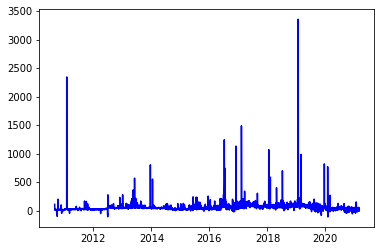

In [10]:
# plotting the daily resampled data

plt.plot(data_daily.ElecPrice, 'b')
plt.show()

In [11]:
daily_fcst = data.resample('D').sum()
daily_fcst = daily_fcst.reset_index()
daily_fcst.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [12]:
adf_sys = adfuller(daily_fcst.SysLoad)

In [34]:
p_value_sys = adf_sys[1]
print(f'{p_value_sys = :.6f}')

p_value_sys = 0.004254


In [14]:
adf_gas = adfuller(daily_fcst.GasPrice)

In [35]:
p_value_gas = adf_gas[1]
print(f'{p_value_gas = :.6f}')

p_value_gas = 0.045027


In [16]:
#Critical values for GasPrice
print('Critical Values:')
for k, v in adf_gas[4].items():
    print(f'{k} : {v}')

Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [17]:
adf_elec = adfuller(daily_fcst.ElecPrice)

In [18]:
#Critical values for ElecPrice
print('Critical Values:')
for k, v in adf_elec[4].items():
    print(f'{k} : {v}')

Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [19]:
fcst_data = daily_fcst[['FullDate','ElecPrice']]
rename_dict = {
    'FullDate':'ds',
    'ElecPrice':'y'
}
fcst_data = fcst_data.rename(columns=rename_dict)

fcst_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [20]:
# splitting data into train and test set
# Using first 2757 datapoints as the train set and the rest as test set

fcst_train = fcst_data.iloc[:2757]
fcst_test = fcst_data.iloc[2757:]

fcst_train.shape,fcst_test.shape

((2757, 2), (1077, 2))

In [21]:
model = Prophet()
model = model.fit(fcst_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvo4pezw/ut55numf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvo4pezw/dhbwgk3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44264', 'data', 'file=/tmp/tmpfvo4pezw/ut55numf.json', 'init=/tmp/tmpfvo4pezw/dhbwgk3n.json', 'output', 'file=/tmp/tmpfvo4pezw/prophet_modelq24w47_w/prophet_model-20230130161937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:19:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:19:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
forecast = model.predict(fcst_test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.565824,32.160131,4985.373425,2684.565824,2684.565824,-155.040628,-155.040628,-155.040628,9.737379,9.737379,9.737379,-164.778008,-164.778008,-164.778008,0.0,0.0,0.0,2529.525196
1,2018-03-21,2685.359782,252.815999,5139.248059,2685.359782,2685.359782,-2.567491,-2.567491,-2.567491,159.353195,159.353195,159.353195,-161.920686,-161.920686,-161.920686,0.0,0.0,0.0,2682.792291
2,2018-03-22,2686.153740,385.777890,5317.556968,2686.153740,2686.153740,95.607310,95.607310,95.607310,257.107547,257.107547,257.107547,-161.500237,-161.500237,-161.500237,0.0,0.0,0.0,2781.761050
3,2018-03-23,2686.947698,111.885445,5076.235939,2686.947698,2686.947698,-113.077820,-113.077820,-113.077820,50.273097,50.273097,50.273097,-163.350918,-163.350918,-163.350918,0.0,0.0,0.0,2573.869878
4,2018-03-24,2687.741656,39.223858,4793.578148,2687.741656,2687.741656,-438.673661,-438.673661,-438.673661,-271.443120,-271.443120,-271.443120,-167.230541,-167.230541,-167.230541,0.0,0.0,0.0,2249.067995


In [49]:
# Creating custom metrics

#rmse
def rmse(actual,predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

# mape
def mape(actual,predicted):
    return np.mean(np.abs((np.array(actual) - np.array(predicted)) / actual)) * 100

In [24]:
value = fcst_test.y
pred = forecast.yhat

rmse = rmse(value,pred)
print(f'{rmse = :.2f}')

rmse = 3208.06


In [25]:
mape = mape(value,pred)
print(f'{mape = :.2f}')

mape = 544.73


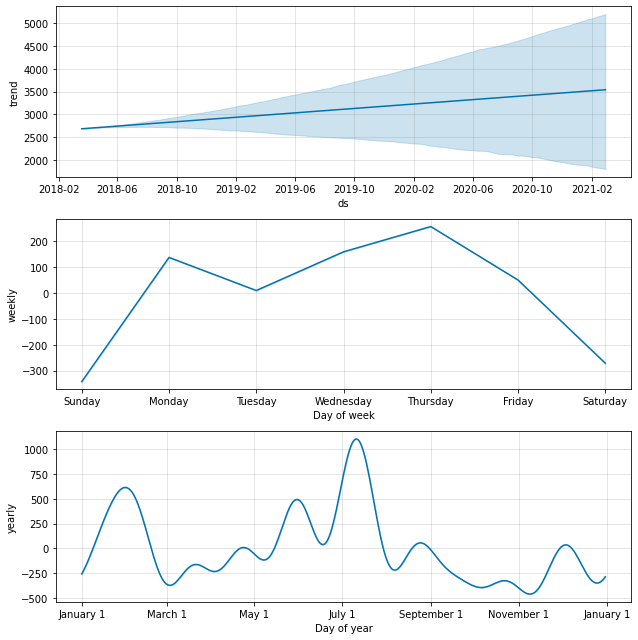

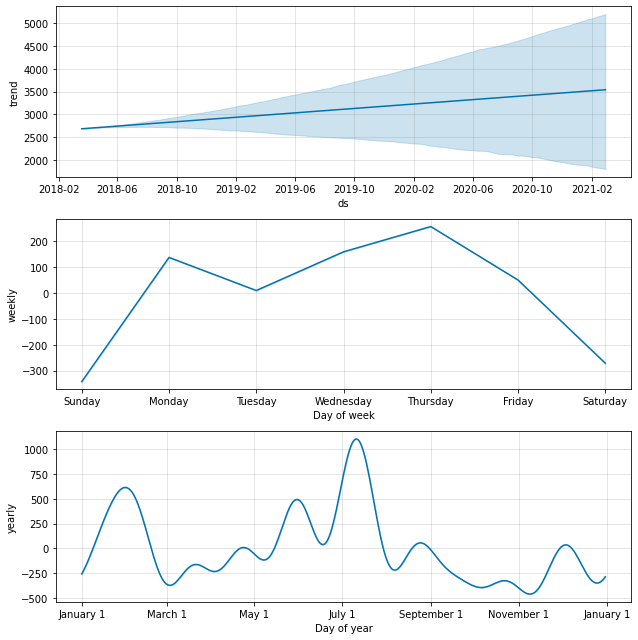

In [26]:
model.plot_components(forecast)

## Multivariate Forecasting

In [27]:
#Using same data 'fcst_data'

fcst_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [28]:
fcst_data["add1"] = daily_fcst['SysLoad']
fcst_data["add2"] = daily_fcst['Tmax']
fcst_data["add3"] = daily_fcst['GasPrice']

In [29]:
fcst_data.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [30]:
# splitting data into train and test set
# Using first 2757 datapoints as the train set and the rest as test set

fcst_train = fcst_data.iloc[:2757]
fcst_test = fcst_data.iloc[2757:]

fcst_train.shape,fcst_test.shape

((2757, 5), (1077, 5))

In [31]:
model2 = Prophet()

# Adding other independent variables as regressors
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

model2 = model2.fit(fcst_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvo4pezw/1cf1awbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvo4pezw/48tlubha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61140', 'data', 'file=/tmp/tmpfvo4pezw/1cf1awbw.json', 'init=/tmp/tmpfvo4pezw/48tlubha.json', 'output', 'file=/tmp/tmpfvo4pezw/prophet_modelrs6_529a/prophet_model-20230130161941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:19:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:19:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
forecast2 = model2.predict(fcst_test)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1867.204510,-341.095134,4227.022484,1867.204510,1867.204510,-856.286567,-856.286567,-856.286567,0.236280,...,-84.476147,-84.476147,-84.476147,-39.061079,-39.061079,-39.061079,0.0,0.0,0.0,1986.764063
1,2018-03-21,1867.893046,-229.345659,4218.605839,1867.893046,1867.893046,-1026.281456,-1026.281456,-1026.281456,0.233477,...,42.524741,42.524741,42.524741,-29.773204,-29.773204,-29.773204,0.0,0.0,0.0,1978.166932
2,2018-03-22,1868.581583,698.904073,5109.669868,1868.581583,1868.581583,-214.935967,-214.935967,-214.935967,0.219893,...,145.612882,145.612882,145.612882,-24.740713,-24.740713,-24.740713,0.0,0.0,0.0,2898.308005
3,2018-03-23,1869.270119,406.399622,4771.815104,1869.270119,1869.270119,-274.867855,-274.867855,-274.867855,0.211915,...,-44.306399,-44.306399,-44.306399,-23.822245,-23.822245,-23.822245,0.0,0.0,0.0,2582.549267
4,2018-03-24,1869.958655,-714.802180,3765.289330,1869.958655,1869.958655,-1076.321337,-1076.321337,-1076.321337,0.209975,...,-117.531858,-117.531858,-117.531858,-26.767060,-26.767060,-26.767060,0.0,0.0,0.0,1435.761426


In [37]:
value = fcst_test.y
pred = forecast2.yhat

rmse = rmse(value,pred)
print(f'{rmse = :.2f}')

rmse = 2707.61


In [38]:
mape = mape(value,pred)
print(f'{mape = :.2f}')

mape = 231.91


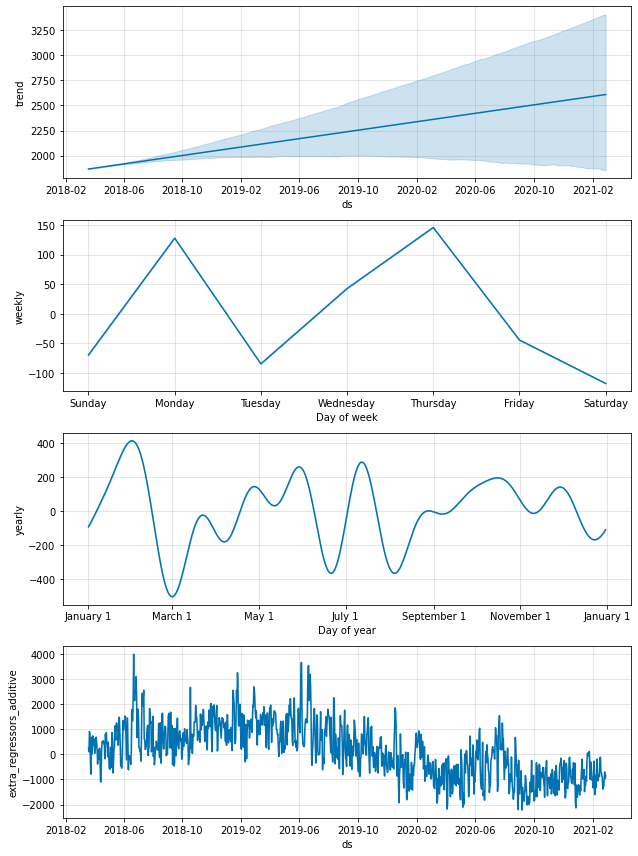

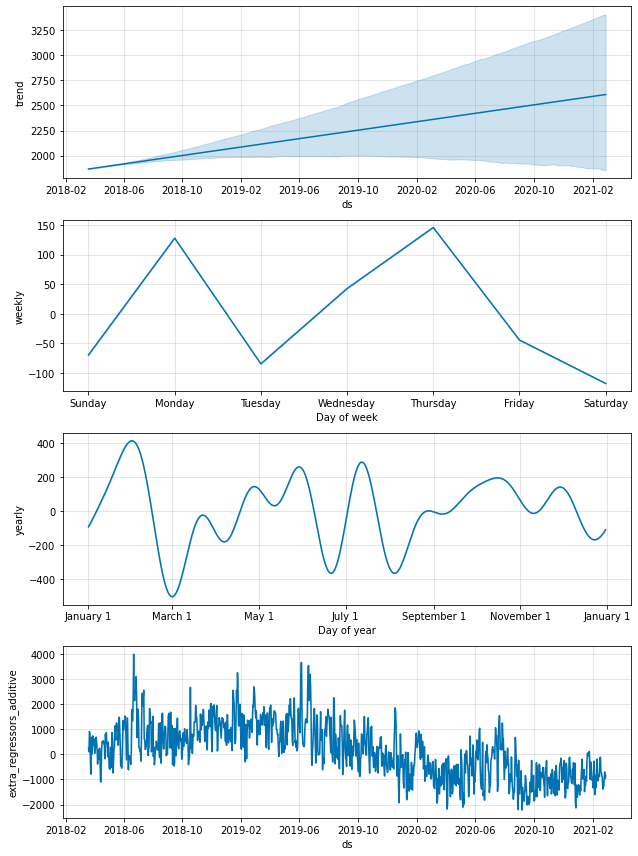

In [39]:
model2.plot_components(forecast2)

In [40]:
new_fcst = fcst_data.drop(columns='add2')
new_fcst.head()

,ds,y,add1,add3
0,2010-09-01,2751.700,41565.380,88.56
1,2010-09-02,570.810,38898.990,88.56
2,2010-09-03,504.975,41665.760,106.80
3,2010-09-04,502.275,35638.085,81.36
4,2010-09-05,500.555,35611.410,106.80


In [41]:
new_train = new_fcst.iloc[:2757]
new_test = new_fcst.iloc[2757:]

new_train.shape,new_test.shape

((2757, 4), (1077, 4))

In [42]:
model3 = Prophet()
model3 = model3.fit(new_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvo4pezw/jj4aw100.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvo4pezw/o39n0r0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27474', 'data', 'file=/tmp/tmpfvo4pezw/jj4aw100.json', 'init=/tmp/tmpfvo4pezw/o39n0r0a.json', 'output', 'file=/tmp/tmpfvo4pezw/prophet_model_jeuwz_y/prophet_model-20230130163349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:33:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:33:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [43]:
forecast3 = model3.predict(new_test)
forecast3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.565824,142.573895,4883.401893,2684.565824,2684.565824,-155.040628,-155.040628,-155.040628,9.737379,9.737379,9.737379,-164.778008,-164.778008,-164.778008,0.0,0.0,0.0,2529.525196
1,2018-03-21,2685.359782,282.038045,4954.099043,2685.359782,2685.359782,-2.567491,-2.567491,-2.567491,159.353195,159.353195,159.353195,-161.920686,-161.920686,-161.920686,0.0,0.0,0.0,2682.792291
2,2018-03-22,2686.153740,392.647376,5390.900493,2686.153740,2686.153740,95.607310,95.607310,95.607310,257.107547,257.107547,257.107547,-161.500237,-161.500237,-161.500237,0.0,0.0,0.0,2781.761050
3,2018-03-23,2686.947698,161.280491,4816.666325,2686.947698,2686.947698,-113.077820,-113.077820,-113.077820,50.273097,50.273097,50.273097,-163.350918,-163.350918,-163.350918,0.0,0.0,0.0,2573.869878
4,2018-03-24,2687.741656,-237.653813,4341.153561,2687.741656,2687.741656,-438.673661,-438.673661,-438.673661,-271.443120,-271.443120,-271.443120,-167.230541,-167.230541,-167.230541,0.0,0.0,0.0,2249.067995


In [50]:
value = new_test.y
pred = forecast3.yhat

In [51]:
mape = mape(value,pred)
print(f'{mape = :.2f}')

mape = 544.73
